## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [2]:
## 
"""
Your code here (optional)
確認硬體資源
"""
nvidia-smi.exe -l

'\nYour code here (optional)\n確認硬體資源\n'

In [3]:
import os
import keras

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [4]:
train, test = keras.datasets.cifar10.load_data()

In [19]:
x_train.shape

(50000, 32, 32, 3)

In [26]:
## 資料前處理
"""
Your code here
"""
from sklearn.preprocessing import MinMaxScaler

def preproc_x(x, flatten=True):
    x = x.reshape(len(x), -1)
    x = MinMaxScaler(feature_range=(-1, 1)).fit_transform(x)    
    return x

def preproc_y(y, num_class=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_class)
    return y

In [27]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

C:\Users\user1\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [34]:
x_train.shape[1:]

(3072,)

In [42]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units = 10, num_neurons=[128,256,512]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units = n_units, activation='relu', name = "hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units = n_units, activation='relu', name = "hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units = output_units, activation='softmax', name='output')(x)
    
    model = keras.models.Model(inputs=[input_layer],outputs = [out])
    return model
model = build_mlp(input_shape=x_train.shape[1:], num_neurons=[128,256,512,64,32])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 128)               393344    
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               33024     
_________________________________________________________________
hidden_layer3 (Dense)        (None, 512)               131584    
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                32832     
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total para

In [43]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [44]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

W0716 00:02:45.096261 23784 deprecation_wrapper.py:119] From C:\Users\user1\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0716 00:02:45.105264 23784 deprecation_wrapper.py:119] From C:\Users\user1\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [45]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0716 00:02:45.811490 23784 deprecation.py:323] From C:\Users\user1\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0716 00:02:45.885492 23784 deprecation_wrapper.py:119] From C:\Users\user1\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 5s 103us/step - loss: 1.7099 - acc: 0.3913 - val_loss: 1.5648 - val_acc: 0.4442
Epoch 2/100
50000/50000 [==============================] - 5s 92us/step - loss: 1.4657 - acc: 0.4851 - val_loss: 1.4309 - val_acc: 0.4950
Epoch 3/100
50000/50000 [==============================] - 4s 89us/step - loss: 1.3522 - acc: 0.5221 - val_loss: 1.3885 - val_acc: 0.5180
Epoch 4/100
50000/50000 [==============================] - 4s 88us/step - loss: 1.2544 - acc: 0.5549 - val_loss: 1.4007 - val_acc: 0.5066
Epoch 5/100
50000/50000 [==============================] - 4s 88us/step - loss: 1.1804 - acc: 0.5815 - val_loss: 1.3482 - val_acc: 0.5279
Epoch 6/100
50000/50000 [==============================] - 4s 87us/step - loss: 1.1108 - acc: 0.6067 - val_loss: 1.3361 - val_acc: 0.5303
Epoch 7/100
50000/50000 [==============================] - 4s 88us/step - loss: 1.0387 - acc: 0.6319 - val_loss: 1.3577 -

50000/50000 [==============================] - 4s 89us/step - loss: 0.0885 - acc: 0.9710 - val_loss: 4.1466 - val_acc: 0.5088
Epoch 60/100
50000/50000 [==============================] - 4s 90us/step - loss: 0.1068 - acc: 0.9650 - val_loss: 4.1143 - val_acc: 0.5069
Epoch 61/100
50000/50000 [==============================] - 4s 87us/step - loss: 0.0936 - acc: 0.9685 - val_loss: 4.1300 - val_acc: 0.5007
Epoch 62/100
50000/50000 [==============================] - 4s 87us/step - loss: 0.0782 - acc: 0.9739 - val_loss: 4.1774 - val_acc: 0.5042
Epoch 63/100
50000/50000 [==============================] - 4s 87us/step - loss: 0.0902 - acc: 0.9696 - val_loss: 4.1016 - val_acc: 0.5121
Epoch 64/100
50000/50000 [==============================] - 4s 87us/step - loss: 0.0818 - acc: 0.9738 - val_loss: 4.2475 - val_acc: 0.5081
Epoch 65/100
50000/50000 [==============================] - 4s 87us/step - loss: 0.0944 - acc: 0.9688 - val_loss: 4.1831 - val_acc: 0.5112
Epoch 66/100
50000/50000 [==============

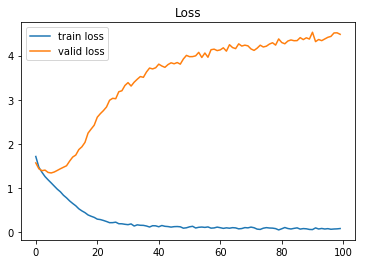

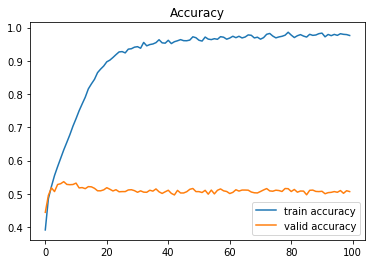

In [47]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()